## Bellman Ford Algorithm

In [2]:
import graphviz as gv
import numpy as np

def adjmShow(M, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(M)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  for u in range(n):
    for v in range(0 if directed else u, n):
      if weighted:
        if not np.isnan(M[u, v]):
          g.edge(str(u), str(v), f"{M[u, v]:.0f}")
      else:
        if M[u, v] == 1:
          g.edge(str(u), str(v))
  return g
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

In [7]:
%%file BFord.txt
1|20 2|10
3|33 4|20
3|10 4|50
5|1
3|-20 5|-2


Overwriting BFord.txt


[None, 0, 0, 2, 1, 3] [0, 20, 10, 20, 40, 21]


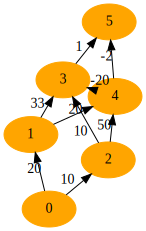

In [14]:
def BellmanFord(graph,start):
    n = len(graph)
    cost = [float('inf')]*n
    path = [None]*n
    cost[start] = 0

    for _ in range(n-1):
        for v in range(n):
            for u, w in graph[v]:
                if cost[v] + w < cost[u]:
                    cost[u] = cost[v] + w
                    path[u] = v
    
    for v in range(n):
        for u, w in graph[v]:
            if cost[v] + w < cost[u]:
                return None, None
    return path, cost

graph, _ = readAdjl("BFord.txt",weighted=True)
graph.append([])
path, cost = BellmanFord(graph,0)
print(path,cost)
adjlShow(graph,directed=True,weighted=True)

In [15]:
%%file wormholes.txt
2
3 3
0 1 1000
1 2 15
2 1 -42
4 4
0 1 10
1 2 20
2 3 30
3 0 -60

Writing wormholes.txt


### Wormholes solution - Online Judge

In [18]:
import SSSP as sp

def main():
    with open("wormholes.txt",mode="r") as file:
        n = int(file.readline().strip())
        for _ in range(n):
            nv, ne = map(int,file.readline().strip().split())
            graph = [[] for _ in range(nv)]
            for _ in range(ne):
                v, u, w = map(int,file.readline().strip().split())
                graph[v].append((u,w))
            path, _ = sp.BellmanFord(graph,0)
            print("possible") if path == None else print("not possible")
    
if __name__ == "__main__":
    main()


possible
not possible
